In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
import matplotlib.image as image

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
!ls -la /data

total 19356
drwxr-xr-x 14 root root    4096 Feb 28 03:41 .
drwxr-xr-x  1 root root    4096 May 23 18:37 ..
-rw-r--r--  1 root root 8963138 Sep 25  2019 ARXIV_V5_CHESTXRAY.pdf
-rw-r--r--  1 root root   92416 Sep 25  2019 BBox_List_2017.csv
-rw-r--r--  1 root root 7861152 Sep 25  2019 Data_Entry_2017.csv
-rw-r--r--  1 root root   72223 Sep 25  2019 FAQ_CHESTXRAY.pdf
drwxr-xr-x  3 root root    4096 Feb 28 03:20 images_001
drwxr-xr-x  3 root root    4096 Feb 28 03:20 images_002
drwxr-xr-x  3 root root    4096 Feb 28 03:21 images_003
drwxr-xr-x  3 root root    4096 Feb 28 03:22 images_004
drwxr-xr-x  3 root root    4096 Feb 28 03:23 images_005
drwxr-xr-x  3 root root    4096 Feb 28 03:24 images_006
drwxr-xr-x  3 root root    4096 Feb 28 03:24 images_007
drwxr-xr-x  3 root root    4096 Feb 28 03:25 images_008
drwxr-xr-x  3 root root    4096 Feb 28 03:26 images_009
drwxr-xr-x  3 root root    4096 Feb 28 03:27 images_010
drwxr-xr-x  3 root root    4096 Feb 28 03:28 images_011
drwxr-xr-x  3 roo

In [3]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
5452,00001457_001.png,No Finding,1,1457,36,F,AP,3056,2544,0.139,0.139,NaN
82355,00020259_001.png,No Finding,1,20259,52,F,AP,3056,2544,0.139,0.139,NaN
29691,00007728_017.png,No Finding,17,7728,34,M,AP,3056,2544,0.139,0.139,NaN


In [4]:
all_xray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


In [5]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
5296,00028518_025.png,Consolidation|Effusion|Mass,25,28518,049Y,F,PA,2021,2021,0.194311,0.194311
5455,00029679_000.png,Atelectasis,0,29679,042Y,M,PA,2021,2021,0.194311,0.194311
4823,00025368_010.png,No Finding,10,25368,042Y,M,PA,2992,2991,0.143000,0.143000


In [6]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  5606 non-null   object 
 1   Finding Labels               5606 non-null   object 
 2   Follow-up #                  5606 non-null   int64  
 3   Patient ID                   5606 non-null   int64  
 4   Patient Age                  5606 non-null   object 
 5   Patient Gender               5606 non-null   object 
 6   View Position                5606 non-null   object 
 7   OriginalImageWidth           5606 non-null   int64  
 8   OriginalImageHeight          5606 non-null   int64  
 9   OriginalImagePixelSpacing_x  5606 non-null   float64
 10  OriginalImagePixelSpacing_y  5606 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 481.9+ KB


## Analysis of field distributions

#### Age

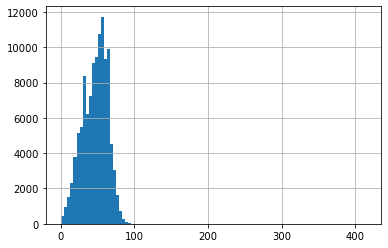

In [8]:
h = all_xray_df['Patient Age'].hist(bins=100)

In [9]:
over100 = all_xray_df[all_xray_df['Patient Age'] > 100]
print(len(over100))
over100

16


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139,0.139,NaN
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,0.139,NaN
48284,00012238_010.png,No Finding,10,12238,148,M,PA,2992,2991,0.143,0.143,NaN
55742,00013950_000.png,No Finding,0,13950,148,M,PA,2964,2939,0.143,0.143,NaN
58650,00014520_026.png,Infiltration|Mass,26,14520,150,M,PA,2992,2991,0.143,0.143,NaN
62929,00015558_000.png,No Finding,0,15558,149,M,PA,2992,2991,0.143,0.143,NaN
74884,00018366_044.png,Pneumothorax,44,18366,152,F,PA,2302,2991,0.143,0.143,NaN
78795,00019346_000.png,Infiltration,0,19346,151,F,PA,2678,2774,0.143,0.143,NaN
84810,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,0.139,NaN
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,412,M,AP,3056,2544,0.139,0.139,NaN


We have 16 records with Patient Age over 100, actually all of them are over 140. Obviously, this is some mistake, so we can simply set those to 100, so at least it falls within feasible range. 

In [10]:
all_xray_df['Patient Age'] = all_xray_df.apply(lambda x: 101 if x['Patient Age'] > 100 else x['Patient Age'], axis=1)

In [11]:
over100 = all_xray_df[all_xray_df['Patient Age'] > 100]
print(len(over100))
over100

16


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
20852,00005567_000.png,Effusion|Pneumonia,0,5567,101,M,AP,3056,2544,0.139,0.139,NaN
46965,00011973_002.png,Edema,2,11973,101,M,AP,3056,2544,0.139,0.139,NaN
48284,00012238_010.png,No Finding,10,12238,101,M,PA,2992,2991,0.143,0.143,NaN
55742,00013950_000.png,No Finding,0,13950,101,M,PA,2964,2939,0.143,0.143,NaN
58650,00014520_026.png,Infiltration|Mass,26,14520,101,M,PA,2992,2991,0.143,0.143,NaN
62929,00015558_000.png,No Finding,0,15558,101,M,PA,2992,2991,0.143,0.143,NaN
74884,00018366_044.png,Pneumothorax,44,18366,101,F,PA,2302,2991,0.143,0.143,NaN
78795,00019346_000.png,Infiltration,0,19346,101,F,PA,2678,2774,0.143,0.143,NaN
84810,00020900_002.png,No Finding,2,20900,101,M,AP,3056,2544,0.139,0.139,NaN
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,101,M,AP,3056,2544,0.139,0.139,NaN


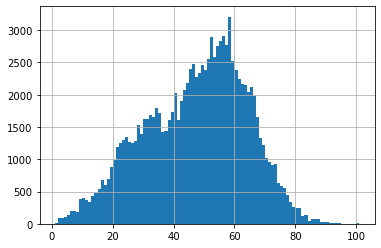

In [12]:
h = all_xray_df['Patient Age'].hist(bins=100)

The Age distubution is roughly normal, somewhat skewed right, with peak around 58 years. 


In [56]:
all_xray_df[all_xray_df['Patient Age'] <= 100][['Patient Age']].describe()

,Patient Age
count,112104.000000
mean,46.872574
std,16.598152
min,1.000000
25%,35.000000
50%,49.000000
75%,59.000000
max,95.000000


##### Patient age range: from 1 to 95 years old

#### Gender

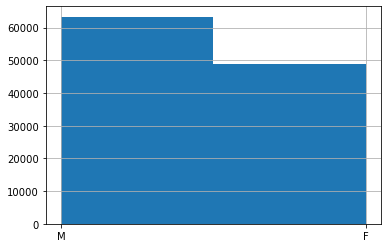

In [14]:
all_xray_df['Patient Gender'].hist(bins=2)

In [15]:
gender_m = all_xray_df[all_xray_df['Patient Gender'] == 'M']
gender_f = all_xray_df[all_xray_df['Patient Gender'] == 'F']

<BarContainer object of 2 artists>

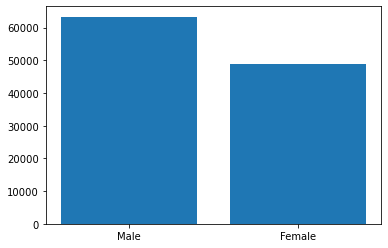

In [16]:
plt.bar(['Male','Female'], [len(gender_m), len(gender_f)])

In [17]:
print(f'Patien Gender distribution\nMale: {len(gender_m)} ({100.0*len(gender_m)/len(all_xray_df):.2f}%), Female: {len(gender_f)} ({100.0*len(gender_f)/len(all_xray_df):.2f}%)')

Patien Gender distribution
Male: 63340 (56.49%), Female: 48780 (43.51%)


#### View position

In [18]:
all_xray_df['View Position'].unique()

array(['PA', 'AP'], dtype=object)

<BarContainer object of 2 artists>

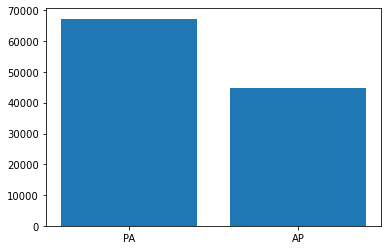

In [19]:
pos_pa = all_xray_df[all_xray_df['View Position'] == 'PA']
pos_ap = all_xray_df[all_xray_df['View Position'] == 'AP']
plt.bar(['PA','AP'], [len(pos_pa), len(pos_ap)])

In [20]:
print(f'View position value distribution\nPA: {len(pos_pa)} ({100.0*len(pos_pa)/len(all_xray_df):.2f}%), AP: {len(pos_ap)} ({100.0*len(pos_ap)/len(all_xray_df):.2f}%)')

View position value distribution
PA: 67310 (60.03%), AP: 44810 (39.97%)


#### Follow-up number

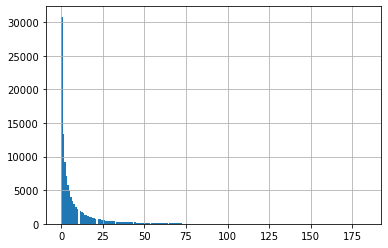

In [21]:
all_xray_df['Follow-up #'].hist(bins=200)

In [22]:
all_xray_df['Follow-up #'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [23]:
follow_up_0 = all_xray_df[all_xray_df['Follow-up #']==0]
print(f'Follow-up number 0 (first visit): {len(follow_up_0)} ({100.0*len(follow_up_0)/len(all_xray_df) :.2f}%)')

follow_up_1 = all_xray_df[all_xray_df['Follow-up #']==1]
print(f'Follow-up number 1 (second visit): {len(follow_up_1)} ({100.0*len(follow_up_1)/len(all_xray_df) :.2f}%)')

follow_up_2 = all_xray_df[all_xray_df['Follow-up #']==2]
print(f'Follow-up number 2 (second visit): {len(follow_up_2)} ({100.0*len(follow_up_2)/len(all_xray_df) :.2f}%)')

follow_up_3 = all_xray_df[all_xray_df['Follow-up #']==3]
print(f'Follow-up number 3 (second visit): {len(follow_up_3)} ({100.0*len(follow_up_3)/len(all_xray_df) :.2f}%)')

follow_up_4 = all_xray_df[all_xray_df['Follow-up #']==4]
print(f'Follow-up number 4 (second visit): {len(follow_up_4)} ({100.0*len(follow_up_4)/len(all_xray_df) :.2f}%)')

Follow-up number 0 (first visit): 30805 (27.48%)
Follow-up number 1 (second visit): 13302 (11.86%)
Follow-up number 2 (second visit): 9189 (8.20%)
Follow-up number 3 (second visit): 7089 (6.32%)
Follow-up number 4 (second visit): 5759 (5.14%)


The follow-up number seems to follow the exponential distribution, from 0 to max number of 183.

#### Finding Labels

In [24]:
all_xray_df['Finding Labels'].unique()

array(['Cardiomegaly', 'Cardiomegaly|Emphysema', 'Cardiomegaly|Effusion',
       'No Finding', 'Hernia', 'Hernia|Infiltration', 'Mass|Nodule',
       'Infiltration', 'Effusion|Infiltration', 'Nodule', 'Emphysema',
       'Effusion', 'Atelectasis', 'Effusion|Mass',
       'Emphysema|Pneumothorax', 'Pleural_Thickening',
       'Effusion|Emphysema|Infiltration|Pneumothorax',
       'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax',
       'Effusion|Pneumonia|Pneumothorax', 'Pneumothorax',
       'Effusion|Infiltration|Pneumothorax', 'Infiltration|Mass',
       'Infiltration|Mass|Pneumothorax', 'Mass',
       'Cardiomegaly|Infiltration|Mass|Nodule',
       'Cardiomegaly|Effusion|Emphysema|Mass',
       'Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumothorax',
       'Emphysema|Mass', 'Emphysema|Mass|Pneumothorax',
       'Atelectasis|Pneumothorax', 'Cardiomegaly|Emphysema|Pneumothorax',
       'Mass|Pleural_Thickening', 'Cardiomegaly|Mass|Pleural_Thickening',
       'Effusion|Infiltra

In [25]:
all_xray_df['Finding Labels'].nunique()

836

In [26]:
findings = set()
for f in all_xray_df['Finding Labels'].unique():
    findings.update(f.split('|'))
print(f'Total number of single diagnoses: {len(findings)}')
findings

Total number of single diagnoses: 15


{'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax'}

In [27]:
no_finding = all_xray_df[all_xray_df['Finding Labels'] == 'No Finding']
print(f'No finding: {len(no_finding)} ({100.0*len(no_finding)/len(all_xray_df) :.2f}%)')

No finding: 60361 (53.84%)


#### Patient ID

In [28]:
unique_patients_num = all_xray_df['Patient ID'].nunique()
print(f'Total unique patients: {unique_patients_num}, average number records per patient: {len(all_xray_df)/unique_patients_num :.2f}')

Total unique patients: 30805, average number records per patient: 3.64


In [29]:
records_per_patient = []
for pid in all_xray_df['Patient ID'].unique():
    records_per_patient.append(len(all_xray_df[all_xray_df['Patient ID'] == pid]))


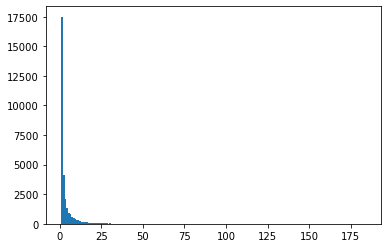

In [30]:
plt.hist(records_per_patient, bins=max(records_per_patient))
plt.show()

In [31]:
def num_patients_with_records(num):
    return (np.array(records_per_patient) == num*np.ones(len(records_per_patient))).sum()

In [32]:
for i in range(1,11):
    print(f'Number of patients with {i} records in the dataset: {num_patients_with_records(i)} ({100.0*num_patients_with_records(i)/unique_patients_num :.2f})')


Number of patients with 1 records in the dataset: 17503 (56.82)
Number of patients with 2 records in the dataset: 4113 (13.35)
Number of patients with 3 records in the dataset: 2100 (6.82)
Number of patients with 4 records in the dataset: 1330 (4.32)
Number of patients with 5 records in the dataset: 938 (3.04)
Number of patients with 6 records in the dataset: 787 (2.55)
Number of patients with 7 records in the dataset: 608 (1.97)
Number of patients with 8 records in the dataset: 494 (1.60)
Number of patients with 9 records in the dataset: 387 (1.26)
Number of patients with 10 records in the dataset: 320 (1.04)


The number of records per patient seems to follow exponential distribution. Total unique patients: 30805, average number records per patient: 3.64, but more than 56% have one record only.

#### Image width & height, pixel spacing

In [33]:
desc = all_xray_df.describe()
desc

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.880298,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.609556,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,101.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [34]:
def show_min_max_values(col, name):
    print(f'{name} range: [{desc[col]["min"]}, {desc[col]["max"]}]')

In [35]:
show_min_max_values('OriginalImage[Width', 'Image Width')
show_min_max_values('Height]', 'Image Height')

Image Width range: [1143.0, 3827.0]
Image Height range: [966.0, 4715.0]


In [36]:
show_min_max_values('OriginalImagePixelSpacing[x', 'Pixel Spacing over X')
show_min_max_values('y]', 'Pixel Spacing over Y')

Pixel Spacing over X range: [0.115, 0.1988]
Pixel Spacing over Y range: [0.115, 0.1988]


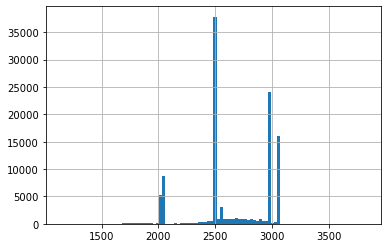

In [37]:
all_xray_df['OriginalImage[Width'].hist(bins=100)

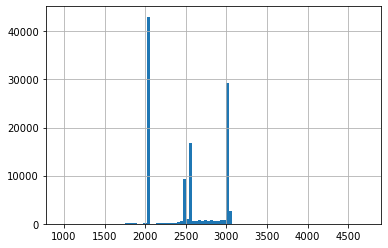

In [38]:
all_xray_df['Height]'].hist(bins=100)

In [39]:
width2500 = all_xray_df[(all_xray_df['OriginalImage[Width'] == 2500)]
width2500

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN
12,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
104746,00028066_002.png,Atelectasis|Effusion|Infiltration,2,28066,24,M,PA,2500,2746,0.143,0.143,NaN
107219,00028928_000.png,No Finding,0,28928,73,F,PA,2500,3016,0.139,0.139,NaN
107276,00028948_005.png,Hernia,5,28948,87,F,PA,2500,3056,0.139,0.139,NaN
112111,00030798_000.png,No Finding,0,30798,30,M,PA,2500,2048,0.171,0.171,NaN


In [40]:
print(f'Images with width 2500: {len(width2500)} ({100.0*len(width2500)/len(all_xray_df) :.2f}%)')

Images with width 2500: 37191 (33.17%)


In [41]:
height2048 = all_xray_df[(all_xray_df['Height]'] == 2048)]
height2048

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN
12,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95095,00024812_000.png,No Finding,0,24812,39,M,PA,2500,2048,0.168,0.168,NaN
95106,00024823_000.png,No Finding,0,24823,27,M,PA,2500,2048,0.168,0.168,NaN
95349,00025060_000.png,No Finding,0,25060,35,M,PA,2500,2048,0.168,0.168,NaN
112111,00030798_000.png,No Finding,0,30798,30,M,PA,2500,2048,0.171,0.171,NaN


In [42]:
print(f'Images with height 2048: {len(height2048)} ({100.0*len(height2048)/len(all_xray_df) :.2f}%)')

Images with height 2048: 37155 (33.14%)


In [43]:
size2500x2048 = all_xray_df[(all_xray_df['OriginalImage[Width'] == 2500) & (all_xray_df['Height]'] == 2048)]
print(f'Images 2500x2048: {len(size2500x2048)} ({100.0*len(size2500x2048)/len(all_xray_df) :.2f}%)')

Images 2500x2048: 37153 (33.14%)


Almost 1/3 of the images has size 2500x2048

## Pneumonia cases

#### Map findings per single finding 

In [44]:
len(findings)

15

In [45]:
findings

{'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax'}

In [46]:
for finding in findings:
    all_xray_df[finding] = all_xray_df['Finding Labels'].map(lambda x: 1.0 if finding in x else 0)

all_xray_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Pneumothorax,Edema,Atelectasis,Pneumonia,Consolidation,Nodule,Infiltration,Mass,Hernia,Cardiomegaly
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
pneumonia = all_xray_df[all_xray_df['Pneumonia'] == 1]
pneumonia

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Pneumothorax,Edema,Atelectasis,Pneumonia,Consolidation,Nodule,Infiltration,Mass,Hernia,Cardiomegaly
48,00000013_010.png,Effusion|Pneumonia|Pneumothorax,10,13,60,M,AP,3056,2544,0.139,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
126,00000032_012.png,Atelectasis|Consolidation|Edema|Pneumonia,12,32,55,F,AP,2500,2048,0.168,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
253,00000056_000.png,Nodule|Pneumonia,0,56,76,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
276,00000061_012.png,Edema|Effusion|Infiltration|Pleural_Thickening...,12,61,77,M,AP,3056,2544,0.139,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
279,00000061_015.png,Pneumonia,15,61,77,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111557,00030536_007.png,Atelectasis|Consolidation|Pneumonia,7,30536,56,F,AP,3056,2544,0.139,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
111627,00030570_001.png,Edema|Infiltration|Pneumonia,1,30570,29,F,AP,3056,2544,0.139,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
111767,00030621_002.png,Pneumonia,2,30621,22,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
111845,00030637_016.png,Consolidation|Pneumonia,16,30637,48,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [48]:
all_findings = all_xray_df[all_xray_df["No Finding"] == 0]
print(f'All findings: {len(all_findings)}')

All findings: 51759


In [49]:
print(f'Pneumonia images: {len(pneumonia)} ({100.0*len(pneumonia)/len(all_xray_df) :.2f}% of all)')
print(f'Pneumonia images: {len(pneumonia)} ({100.0*len(pneumonia)/len(all_findings) :.2f}% of findings)')

Pneumonia images: 1431 (1.28% of all)
Pneumonia images: 1431 (2.76% of findings)


In [50]:
no_pneumonia = all_xray_df[all_xray_df["Pneumonia"] == 0]
print(f'No pneumonia: {len(no_pneumonia)}')

No pneumonia: 110689


In [51]:
no_pneumonia_findings = all_xray_df[ (all_xray_df["Pneumonia"] == 0) & (all_xray_df["No Finding"] == 0) ]
print(f'No pneumonia among findings: {len(no_pneumonia_findings)}')

No pneumonia among findings: 50328


### Feature distributions among pneumonia records

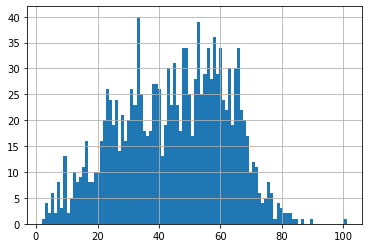

In [52]:
pneumonia['Patient Age'].hist(bins=100)

In [55]:
pneumonia[pneumonia['Patient Age'] <= 100][['Patient Age']].describe()

,Patient Age
count,1430.000000
mean,44.670629
std,17.639098
min,2.000000
25%,31.000000
50%,46.000000
75%,59.000000
max,90.000000


##### Age range for pneumonia cases: from 2 to 90 years old

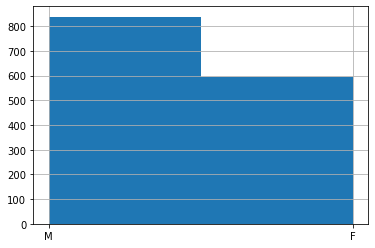

In [53]:
pneumonia['Patient Gender'].hist(bins=2)

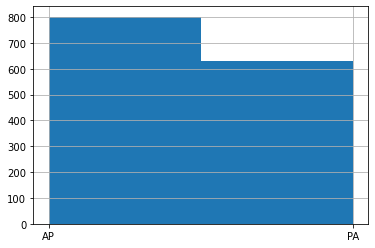

In [54]:
pneumonia['View Position'].hist(bins=2)

In [55]:
pneumonia_unique_patients_num = pneumonia['Patient ID'].nunique()
print(f'Total pneumonia patients: {pneumonia_unique_patients_num}, average number records per patient: {len(pneumonia)/pneumonia_unique_patients_num :.2f}')

Total pneumonia patients: 1008, average number records per patient: 1.42


In [56]:
pneumonia_records_per_patient = []
for pid in pneumonia['Patient ID'].unique():
    pneumonia_records_per_patient.append(len(pneumonia[pneumonia['Patient ID'] == pid]))

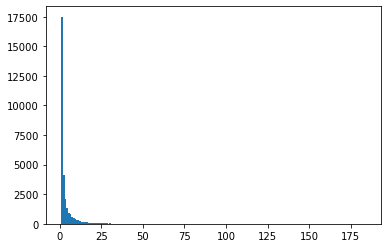

In [57]:
plt.hist(records_per_patient, bins=max(records_per_patient))
plt.show()

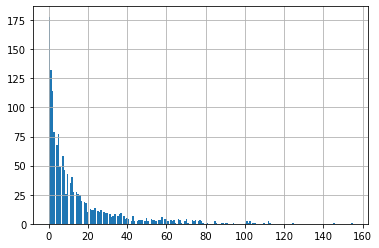

In [58]:
pneumonia['Follow-up #'].hist(bins=200)

Features mostly retained the same distribution among the pneumonia records as in the original dataset. (For 'View Position', 'AP' is slightly more prevalent than 'PA' in the pneumonia records, whereas it is vice versa in the original dataset. But the prevalence is not very significant in both cases).

### Pneumonia & comorbid findings

[Text(0, 0.5, 'Number of Images with Label')]

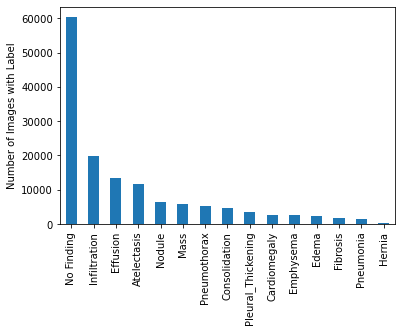

In [59]:
ax = all_xray_df[findings].sum().sort_values(ascending=False).plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')


In [60]:
(all_xray_df[findings].sum()/len(all_xray_df)).sort_values(ascending=False)

No Finding            0.538361
Infiltration          0.177435
Effusion              0.118775
Atelectasis           0.103095
Nodule                0.056466
Mass                  0.051570
Pneumothorax          0.047289
Consolidation         0.041625
Pleural_Thickening    0.030191
Cardiomegaly          0.024759
Emphysema             0.022440
Edema                 0.020540
Fibrosis              0.015037
Pneumonia             0.012763
Hernia                0.002025
dtype: float64

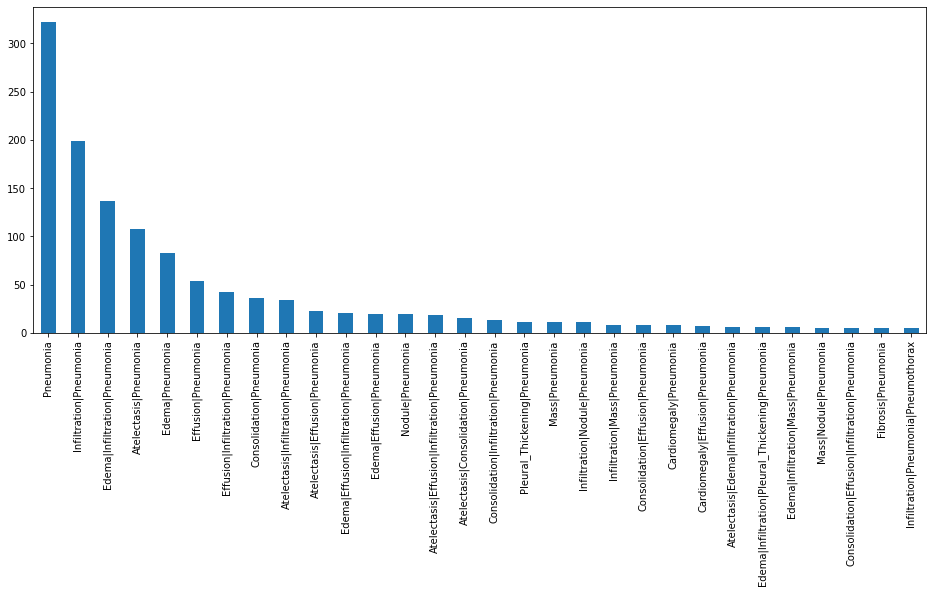

In [61]:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df['Pneumonia']==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')


In [62]:
all_xray_df[all_xray_df['Pneumonia']==1]['Finding Labels'].value_counts()[0:30]

Pneumonia                                          322
Infiltration|Pneumonia                             199
Edema|Infiltration|Pneumonia                       137
Atelectasis|Pneumonia                              108
Edema|Pneumonia                                     83
Effusion|Pneumonia                                  54
Effusion|Infiltration|Pneumonia                     42
Consolidation|Pneumonia                             36
Atelectasis|Infiltration|Pneumonia                  34
Atelectasis|Effusion|Pneumonia                      23
Edema|Effusion|Infiltration|Pneumonia               21
Edema|Effusion|Pneumonia                            19
Nodule|Pneumonia                                    19
Atelectasis|Effusion|Infiltration|Pneumonia         18
Atelectasis|Consolidation|Pneumonia                 15
Consolidation|Infiltration|Pneumonia                13
Pleural_Thickening|Pneumonia                        11
Mass|Pneumonia                                      11
Infiltrati

### Number of deseases per patient

#### Full dataset

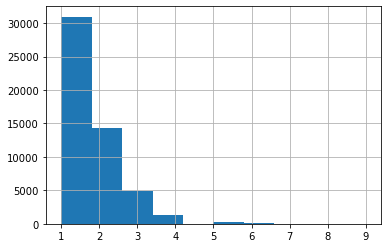

In [63]:
all_findings[findings].sum(axis=1).hist(bins=10)

#### Pneumonia

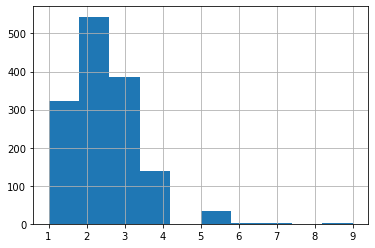

In [64]:
pneumonia[findings].sum(axis=1).hist(bins=10)

In the whole dataset, one finding is prevalent, whereas with pneumonia in most cases it is accompanied with one or two more findings.

## Pixel-wise analysis

In [65]:
pneumo_samples = sample_df[sample_df['Finding Labels'] == 'Pneumonia']
len(pneumo_samples)

14

In [66]:
pneumonia_example_1 = pneumo_samples.iloc[0]
pneumonia_example_1

Image Index                    00008470_008.png
Finding Labels                        Pneumonia
Follow-up #                                   8
Patient ID                                 8470
Patient Age                                030Y
Patient Gender                                F
View Position                                AP
OriginalImageWidth                         2500
OriginalImageHeight                        2048
OriginalImagePixelSpacing_x               0.171
OriginalImagePixelSpacing_y               0.171
Name: 1631, dtype: object

In [67]:
!ls /data/

ARXIV_V5_CHESTXRAY.pdf	images_002  images_007	images_012
BBox_List_2017.csv	images_003  images_008	LOG_CHESTXRAY.pdf
Data_Entry_2017.csv	images_004  images_009	README_CHESTXRAY.pdf
FAQ_CHESTXRAY.pdf	images_005  images_010	test_list.txt
images_001		images_006  images_011	train_val_list.txt


In [68]:
def show_image_distr(img_data):
    f = plt.figure()
    f.set_figwidth(10)

    s1 = f.add_subplot(1, 2, 1)
    s1.set_title('Image')
    plt.imshow(img_data, cmap='gray')


    s2 = f.add_subplot(1, 2, 2)
    s2.set_title('Intensity Distribution')
    plt.hist(img_data.ravel(), bins = 256, color='blue')

    plt.show()

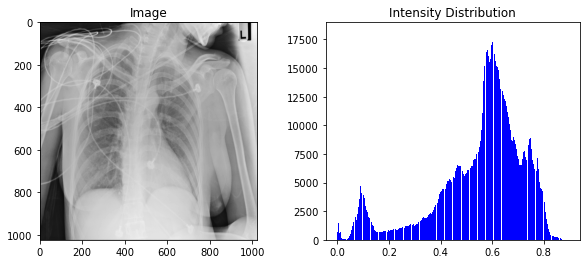

In [69]:
ex1_data = image.imread('/data/images_004/images/' + pneumonia_example_1['Image Index'])
show_image_distr(ex1_data)

In [70]:
def get_image_path(row):
    fpath = None
    f = row['Image Index']
    for d in range(12):
        dname = 'images_' + str(d).zfill(3)
        fname = '/data/' + dname + '/images/' + f
        if os.path.isfile(fname):
            fpath = fname
            print(fpath)
            break
    return fpath

pneumo_samples['image_path'] = pneumo_samples.apply(lambda x: get_image_path(x), axis=1)

/data/images_004/images/00008470_008.png
/data/images_006/images/00011702_043.png
/data/images_006/images/00012158_025.png
/data/images_006/images/00012667_000.png
/data/images_006/images/00012733_000.png
/data/images_007/images/00014201_008.png
/data/images_008/images/00017714_019.png
/data/images_009/images/00019021_001.png
/data/images_009/images/00019865_013.png
/data/images_010/images/00021127_018.png
/data/images_010/images/00022192_032.png
/data/images_010/images/00022877_014.png
/data/images_011/images/00026179_003.png


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [71]:
def get_image_data(row):
    fpath = row['image_path']
    if fpath is not None:
        img = image.imread(fpath)
        return img
    else:
        return None

pneumo_samples['image_data'] = pneumo_samples.apply(lambda x: get_image_data(x), axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [72]:
pneumo_samples.head(2)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,image_path,image_data
1631,00008470_008.png,Pneumonia,8,8470,030Y,F,AP,2500,2048,0.171,0.171,/data/images_004/images/00008470_008.png,"[[0.003921569, 0.003921569, 0.003921569, 0.003..."
2286,00011702_043.png,Pneumonia,43,11702,026Y,F,AP,2500,2048,0.168,0.168,/data/images_006/images/00011702_043.png,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [73]:
pneumo_data = pneumo_samples[pneumo_samples['image_data'].notna()]['image_data'].values
pneumo_data.shape

(13,)

In [74]:
pneumo_intensities = []
for data in pneumo_data:
    pneumo_intensities.extend(data.flatten().tolist())

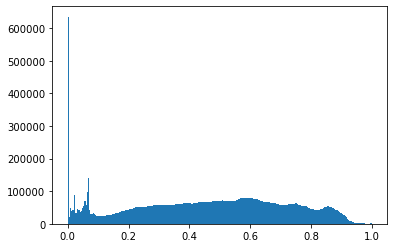

In [75]:
plt.hist(pneumo_intensities,bins=256)
plt.show()

#### Removing background

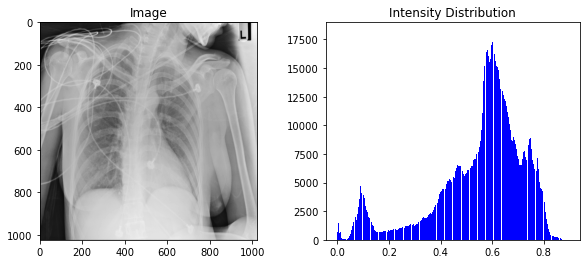

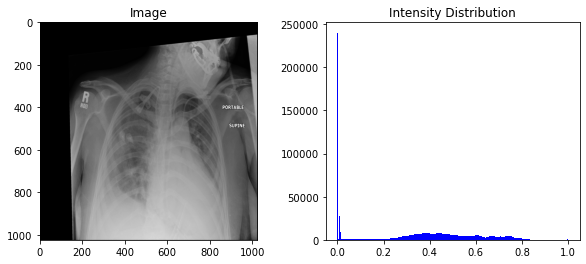

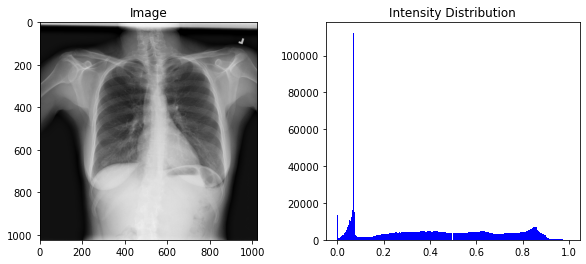

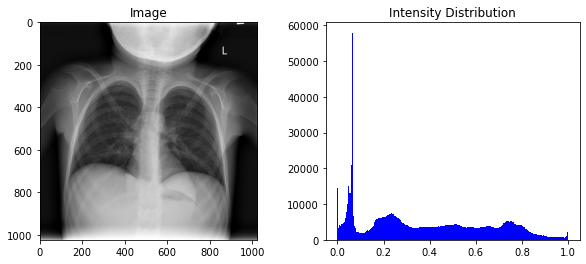

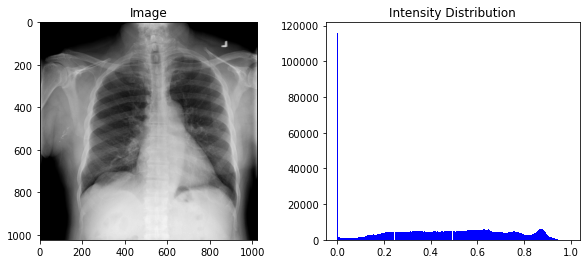

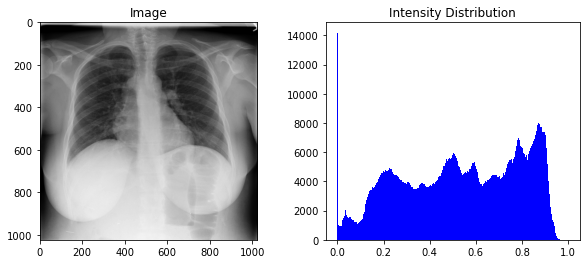

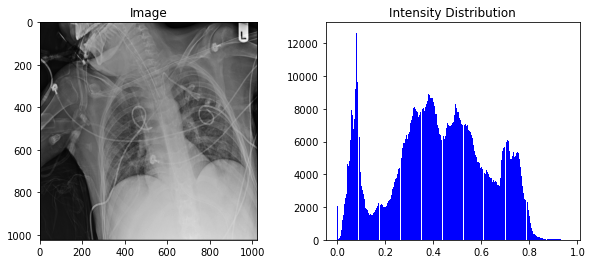

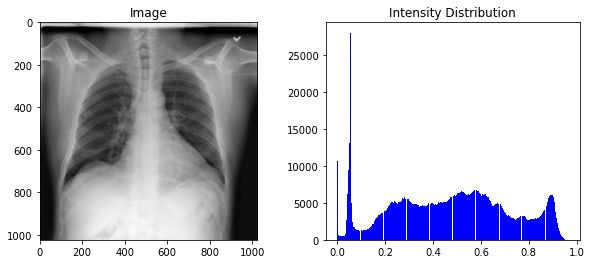

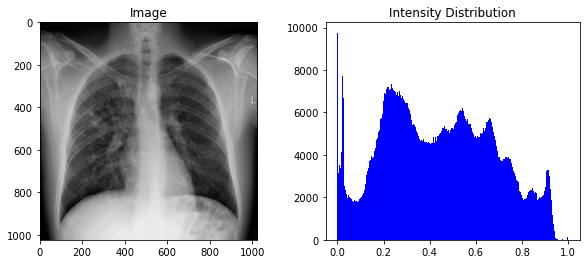

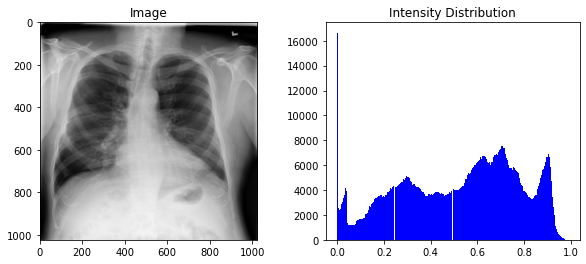

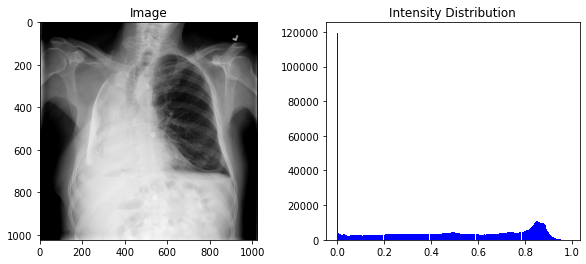

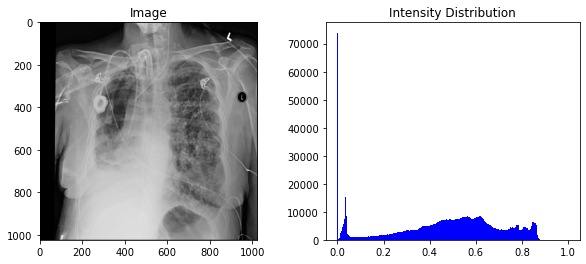

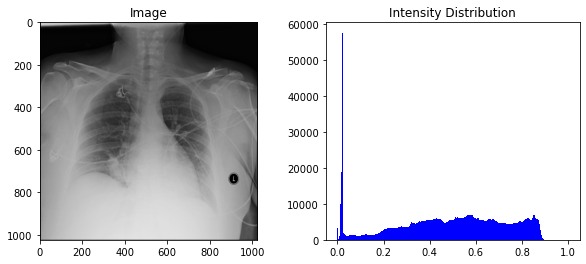

In [76]:
for data in pneumo_data:
    show_image_distr(data)

### Remove background

In [77]:
def show_image_mask(img_data, th):
    f = plt.figure()
    f.set_figwidth(15)

    s1 = f.add_subplot(1, 3, 1)
    s1.set_title('Image')
    plt.imshow(img_data, cmap='gray')

    mask = data > th

    s2 = f.add_subplot(1, 3, 2)
    s2.set_title('Mask')
    plt.imshow(mask.astype(int)*255, cmap='gray')
    
    s3 = f.add_subplot(1, 3, 3)
    s3.set_title('Intensity Distribution')
    plt.hist(img_data[mask], bins = 256, color='blue')

    plt.show()

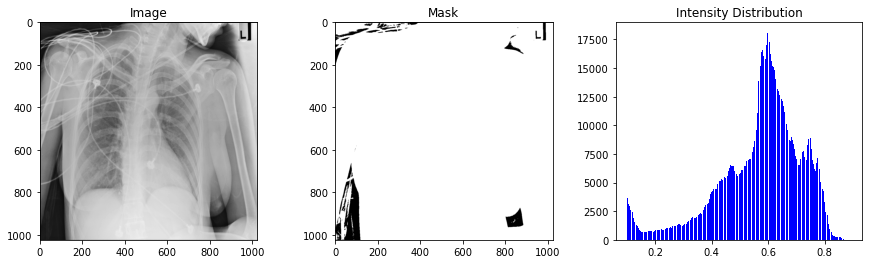

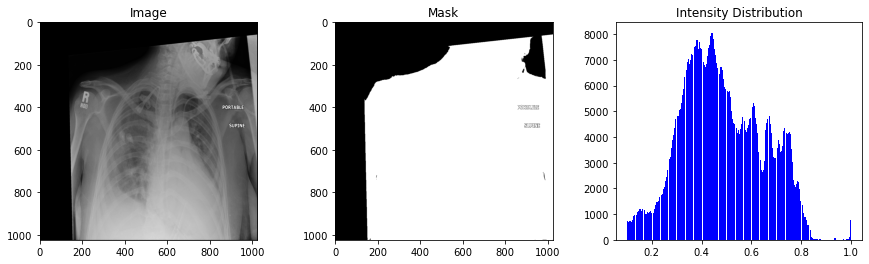

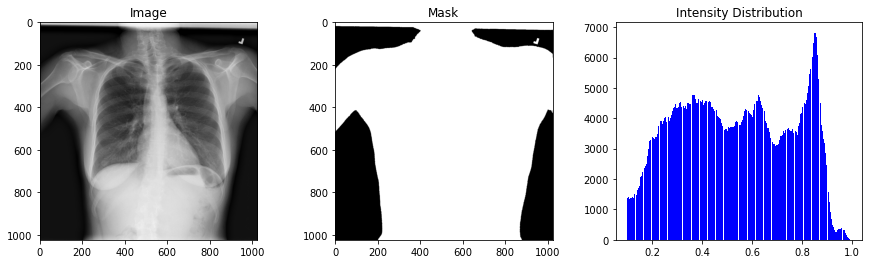

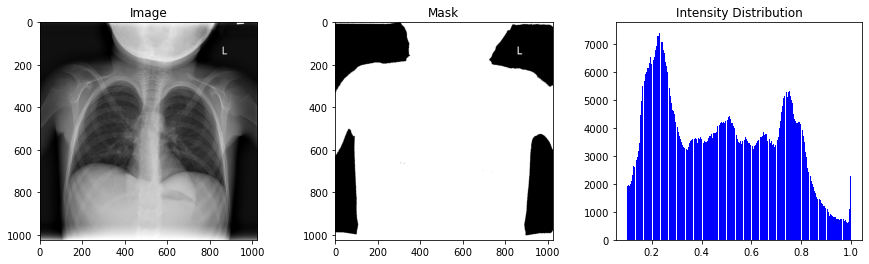

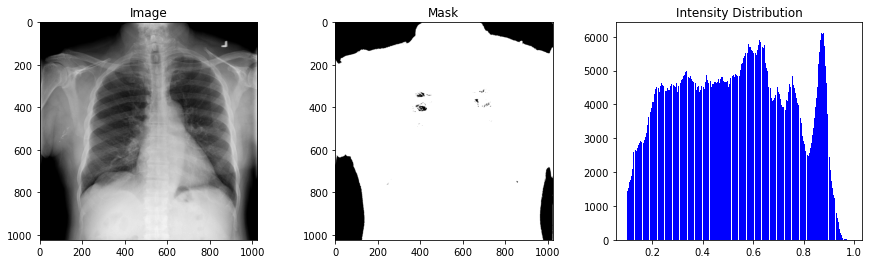

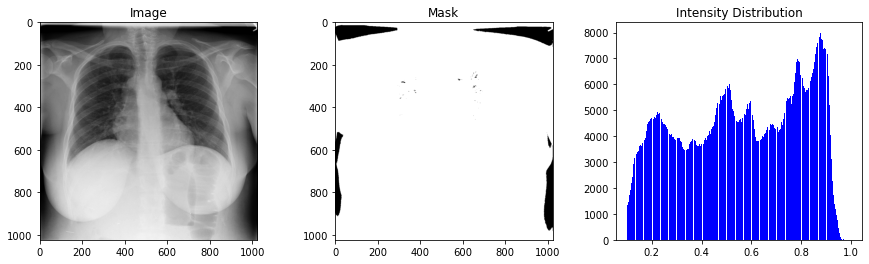

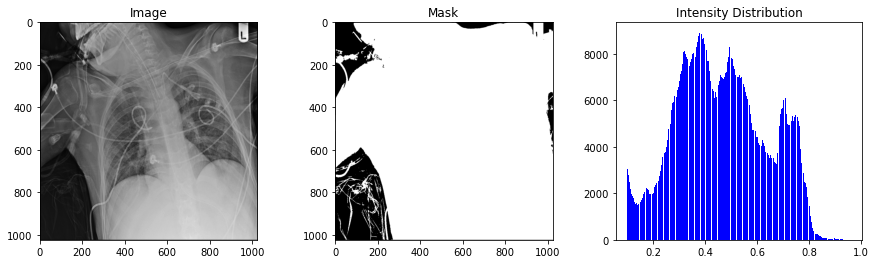

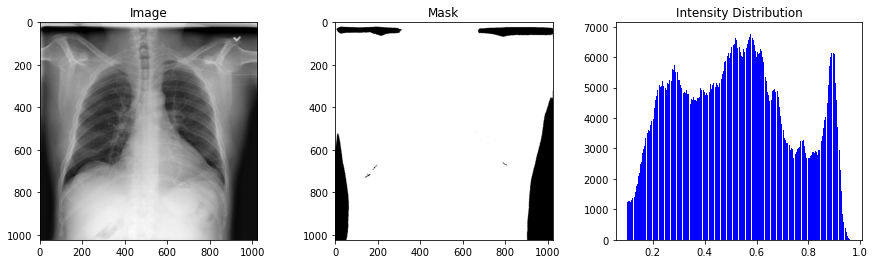

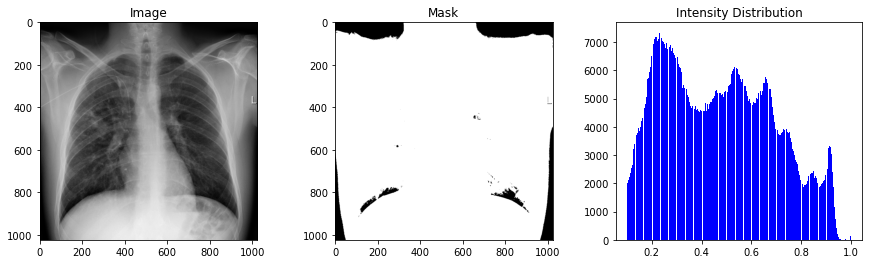

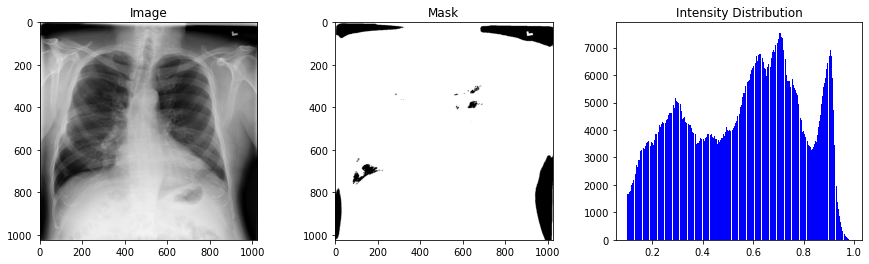

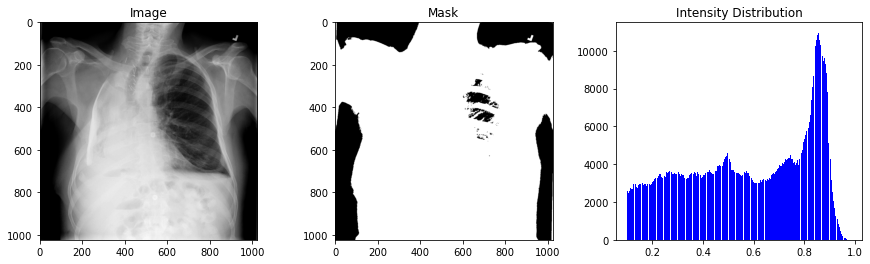

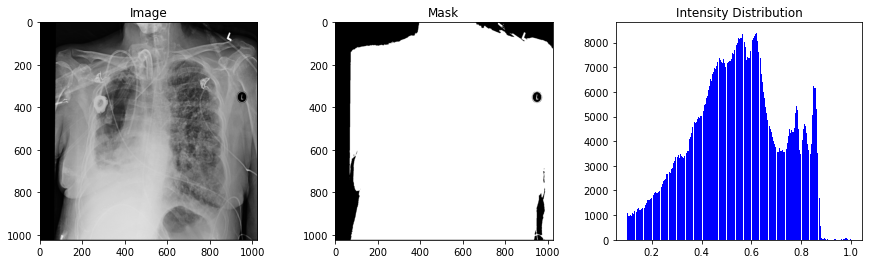

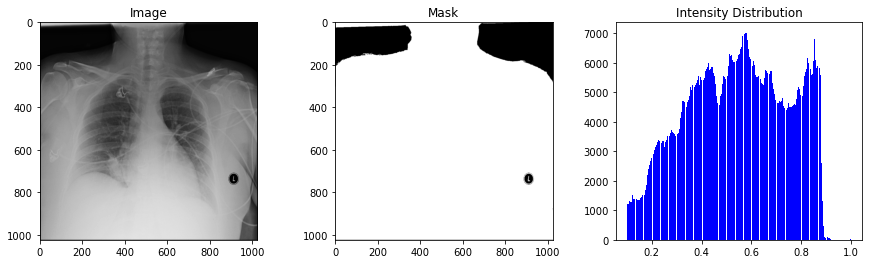

In [78]:
background_threshold = 0.1

for data in pneumo_data:
    show_image_mask(data, background_threshold)

#### Intensity distribution over all images with pneumonia, removing background

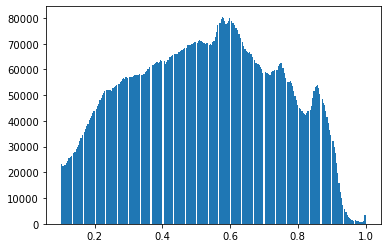

In [79]:
pneumo_intensities = []
for data in pneumo_data:
    mask = data > background_threshold
    pneumo_intensities.extend(data[mask].tolist())
plt.hist(pneumo_intensities,bins=256)
plt.show()

### Intensity (No Finding)

In [80]:
nf_samples = sample_df[sample_df['Finding Labels'] == 'No Finding'].iloc[:len(pneumo_samples)]
nf_samples

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168000,0.168000
6,00000042_002.png,No Finding,2,42,071Y,M,AP,3056,2544,0.139000,0.139000
7,00000057_001.png,No Finding,1,57,071Y,M,AP,3056,2544,0.139000,0.139000
9,00000061_019.png,No Finding,19,61,077Y,M,AP,3056,2544,0.139000,0.139000
12,00000080_005.png,No Finding,5,80,067Y,F,PA,1884,2021,0.194311,0.194311
13,00000083_000.png,No Finding,0,83,056Y,F,PA,2048,2500,0.171000,0.171000
17,00000099_006.png,No Finding,6,99,058Y,F,AP,2048,2500,0.168000,0.168000
24,00000121_004.png,No Finding,4,121,054Y,M,AP,2500,2048,0.168000,0.168000
28,00000165_008.png,No Finding,8,165,078Y,M,PA,2940,2900,0.143000,0.143000
34,00000188_001.png,No Finding,1,188,045Y,M,PA,2698,2991,0.143000,0.143000


In [81]:
nf_samples['image_path'] = nf_samples.apply(lambda x: get_image_path(x), axis=1)
nf_samples['image_data'] = nf_samples.apply(lambda x: get_image_data(x), axis=1)

/data/images_001/images/00000017_001.png
/data/images_001/images/00000042_002.png
/data/images_001/images/00000057_001.png
/data/images_001/images/00000061_019.png
/data/images_001/images/00000080_005.png
/data/images_001/images/00000083_000.png
/data/images_001/images/00000099_006.png
/data/images_001/images/00000121_004.png
/data/images_001/images/00000165_008.png
/data/images_001/images/00000188_001.png
/data/images_001/images/00000194_004.png
/data/images_001/images/00000206_000.png
/data/images_001/images/00000231_005.png
/data/images_001/images/00000239_003.png


In [82]:
nf_samples = nf_samples[nf_samples['image_path'].notna()]
nf_samples.head(2)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,image_path,image_data
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168,/data/images_001/images/00000017_001.png,"[[0.023529412, 0.03137255, 0.03137255, 0.03137..."
6,00000042_002.png,No Finding,2,42,071Y,M,AP,3056,2544,0.139,0.139,/data/images_001/images/00000042_002.png,"[[0.0, 0.015686275, 0.05490196, 0.050980393, 0..."


#### Removing background

In [83]:
len(nf_samples)

14

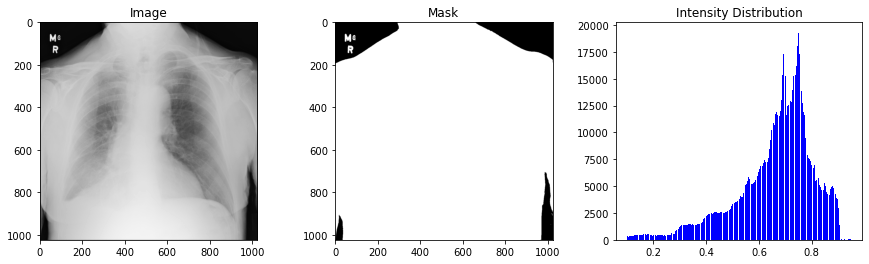

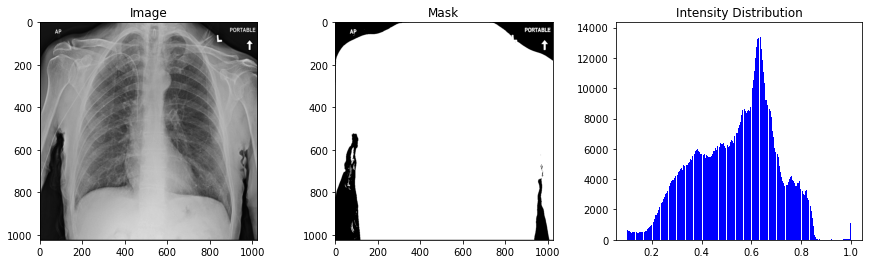

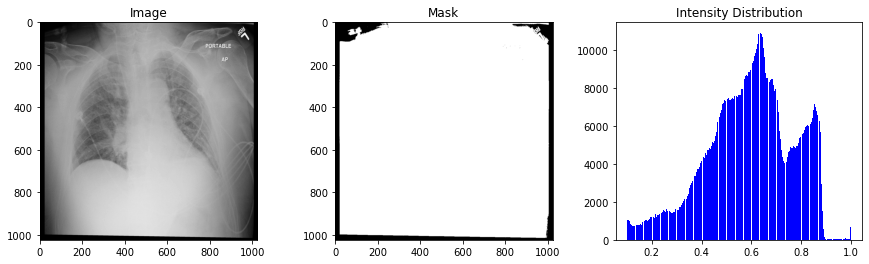

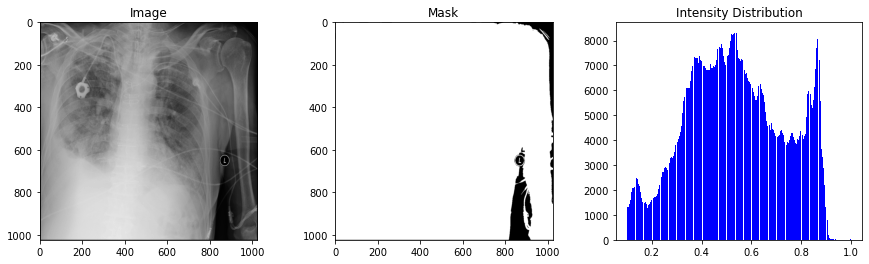

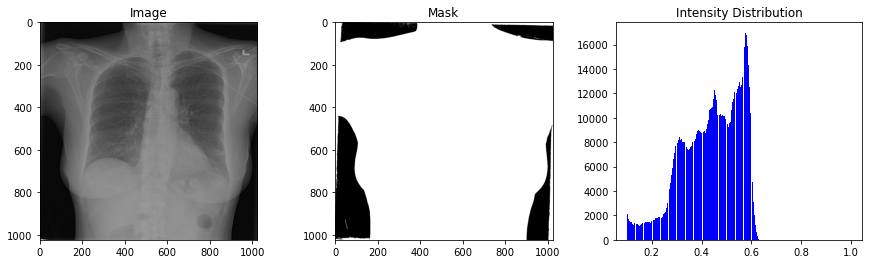

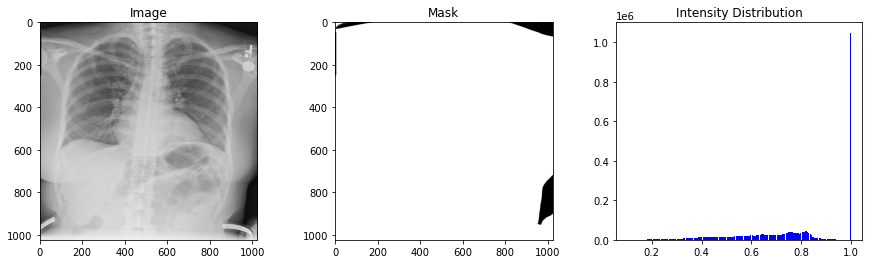

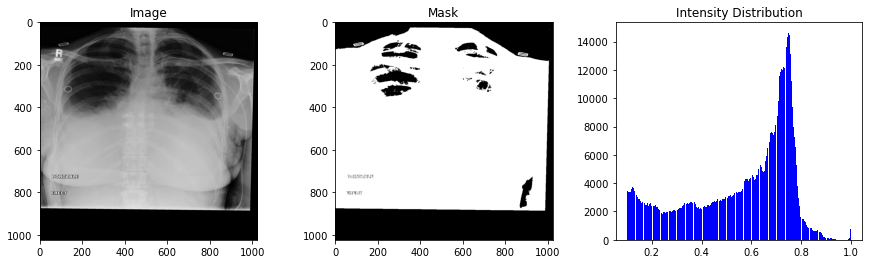

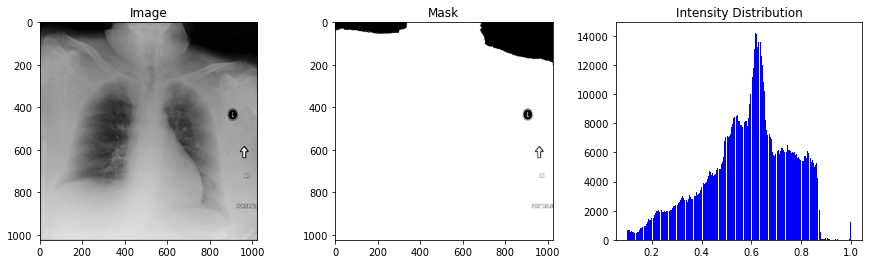

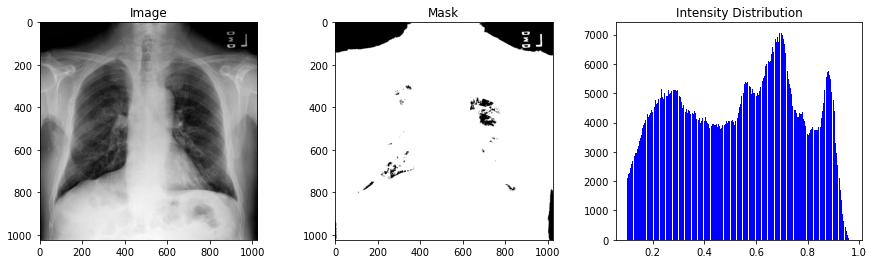

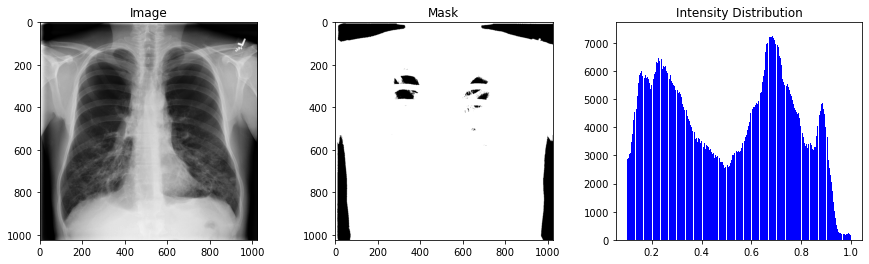

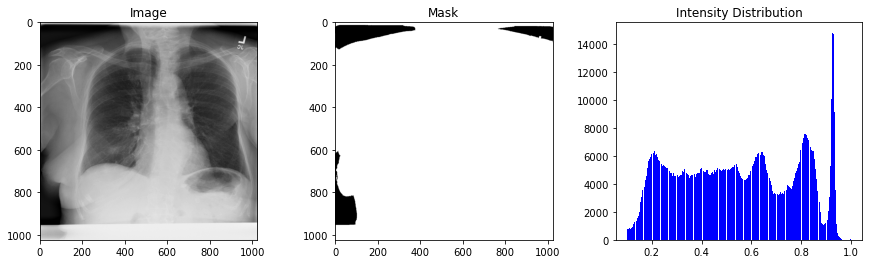

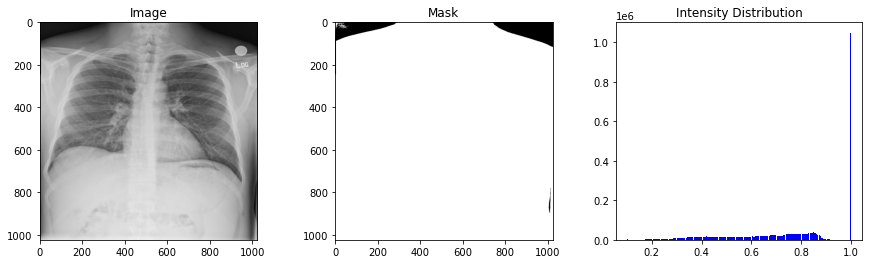

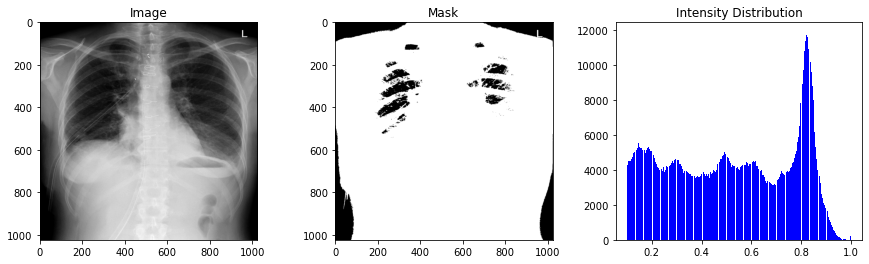

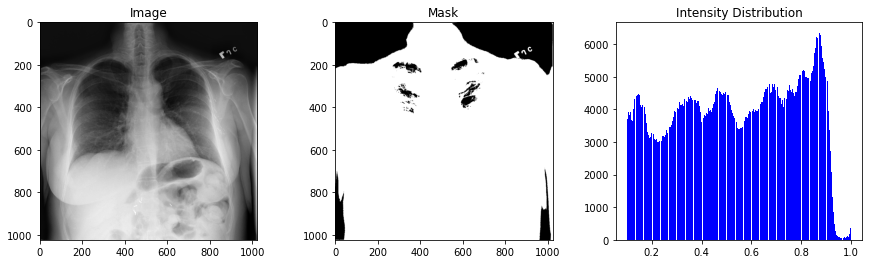

In [89]:
nf_data = nf_samples['image_data'].values
for data in nf_data:
    show_image_mask(data, background_threshold)
        

#### Need to remove foreground too (excessively white areas of extenal entities)

In [92]:
foreground_threshold = 0.9

### Intensity distribution "Pneumonia" vs "No Findings"

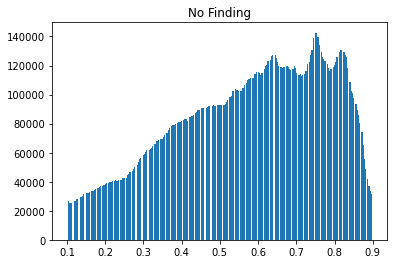

In [95]:
nf_intensities = []
for data in nf_data:
    mask = (data > background_threshold) & (data < foreground_threshold)
    nf_intensities.extend(data[mask].tolist())
plt.hist(nf_intensities,bins=256)
plt.title('No Finding')
plt.show()

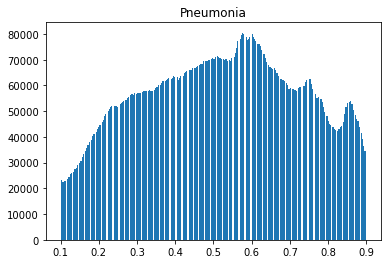

In [96]:
pneumo_intensities = []
for data in pneumo_data:
    mask = (data > background_threshold) & (data < foreground_threshold)
    pneumo_intensities.extend(data[mask].tolist())
plt.hist(pneumo_intensities,bins=256)
plt.title('Pneumonia')
plt.show()

#### Summary

* Images in the dataset are normalized, in the range from 0.0 to 1.0
* Background (almost black) has to be removed, suggested threshold: > 0.1
* Foreground (almost white) has to be removed too, suggested thereshold: < 0.9. (These could be external entities, absorbing light very well, possibly pieces of plastic?)
* Looks like 'pneumonia' images have distribution peak between 0.55 and 0.6, whereas 'no finding' images have peak at higher ('more light') values, around 0.75.

